#  Option pricing in the (rough) Heston model（fractional Riccati equation）



In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
 

In the rough Heston model, the pair (S,V)of the stock price and its instantaneous variance has the dynamics $\mathrm{d}S_t=S_t\sqrt{V_t}\mathrm{d}W_t$ , $S_0=s_0\in R_+$
$V_t=V_0+\frac{1}{\Gamma(\alpha)}\int_{0}^{t}(t-s)^{\alpha-1}\eta(m-V_s)\mathrm{d}s+\frac{1}{\Gamma(\alpha)}\int_{0}^{t}(t-s)^{\alpha-1}\zeta\sqrt{V_s}\mathrm{d}B_s , V_0\in R_+$
where $\eta,m,\zeta$ are positive real numbers, and the correlation between the two Brownian motion W and B is $\rho \in (-1,1)$. The parameter $\alpha \in (0,2)$ plays an important role in representing the Hurst parameter. 

 First, consider the case where the model is not rough(**$\alpha$ = 1**),
 then the equation will be reduced to $\psi^{'} = \lambda\psi^2+\mu\psi+\nu$

We get the solution: $\psi(t) = \sum a_kt^k$ with $a_0=0,a_1=\nu/\Gamma(2),a_{k+1}=(\lambda a_k^{*2}+\mu a_k)/(k+1)$


# inputs:  
$\lambda - \text{second order coefficient of the equation} \\ 
\mu - \text{first order coefficient of the equation} \\
\nu - \text{the intercept of the equation}\\
t - \text{time}$

# output:

**Solutions of the equation: $\psi(t)$**



In [ ]:
# generate random data in matrix[:,400] using monte carlo sampling

lambda_1 = np.random.uniform(0.0001,0.001,400)
mu = np.random.uniform(-3,-1,400)
nu = np.random.uniform(18,20,400)

t = np.random.uniform(0,1/252)


r_max = 150

def return_all_the_coefficients():  # return the list of coefficients up to a_k

  coefficients = np.empty((r_max+1,400))  # initialize the coefficient in the form of matrix

  a0 = 0
  a1 = nu
  coefficients[0,:] = a0
  coefficients[1,:] = a1

  def second_order_coefficients_convol(list_of_coefficients,k): #return a^*2_k given the first k-1 coefficients
    if k==1:
      return 0
    else:
      sum1 = 0
      for l in range(1,k):
        a_l = list_of_coefficients[l,:]
        a_k_l = list_of_coefficients[k-l,:]
        sum1 += a_l*a_k_l
      return sum1

  def second_order_coefficients(list_of_coefficients,n): #return the coefficient a_n given the discrete time convolution equation
    k = n-1
    a_k_star_quadratic = second_order_coefficients_convol(list_of_coefficients,k)
    a_k = list_of_coefficients[k,:]
    a_n = (lambda_1*a_k_star_quadratic + mu*a_k)/(k+1)

    return a_n

  for i in range(2,r_max+1):
    coefficients[i,:] = second_order_coefficients(coefficients,i)

  return coefficients
  
 

  
  

In [ ]:
 coeff=return_all_the_coefficients()
 coeff

array([[ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 1.81215485e+001,  1.99090575e+001,  1.97605967e+001, ...,
         1.82420692e+001,  1.83171378e+001,  1.80005083e+001],
       [-1.17747812e+001, -1.57992414e+001, -2.26041278e+001, ...,
        -1.15933447e+001, -1.01809584e+001, -1.29464379e+001],
       ...,
       [-7.47590324e-084, -8.49643351e-078, -5.67291013e-072, ...,
        -1.76280691e-098, -1.55453078e-096, -2.15278339e-076],
       [ 1.97088544e-084,  2.45504868e-078,  1.78053644e-072, ...,
         3.67600602e-099,  3.35639604e-097,  6.38126429e-077],
       [-5.19587974e-085, -7.09387537e-079, -5.58850740e-073, ...,
        -7.66562698e-100, -7.24681331e-098, -1.89152955e-077]])

In [ ]:
len(coeff)


151

In [ ]:

coef_df = pd.DataFrame(coeff)
coef_df = coef_df.rename(columns={0:"val"})
coef_df.shape[1]
coef_df

,val,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.812155e+01,1.990906e+01,1.976060e+01,1.948613e+01,1.821551e+01,1.917793e+01,1.852189e+01,1.895283e+01,1.803343e+01,1.972274e+01,1.864820e+01,1.940446e+01,1.955698e+01,1.877959e+01,1.967478e+01,1.807530e+01,1.832628e+01,1.993274e+01,1.896078e+01,1.961423e+01,1.803427e+01,1.963722e+01,1.853600e+01,1.839160e+01,1.826975e+01,1.931878e+01,1.938951e+01,1.975561e+01,1.981389e+01,1.957568e+01,1.961640e+01,1.993505e+01,1.969183e+01,1.922380e+01,1.912924e+01,1.911862e+01,1.871942e+01,1.974796e+01,1.935251e+01,1.970794e+01,...,1.888474e+01,1.960674e+01,1.801276e+01,1.887569e+01,1.898168e+01,1.891957e+01,1.992252e+01,1.904262e+01,1.937076e+01,1.855482e+01,1.860559e+01,1.883170e+01,1.916464e+01,1.861369e+01,1.989735e+01,1.882227e+01,1.925519e+01,1.944535e+01,1.974517e+01,1.906643e+01,1.813072e+01,1.922198e+01,1.854275e+01,1.987702e+01,1.807737e+01,1.871751e+01,1.828697e+01,1.923637e+01,1.880718e+01,1.846799e+01,1.828439e+01,1.933597e+01,1.904340e+01,1.956962e+01,1.818997e+01,1.975215e+01,1.851772e+01,1.824207e+01,1.831714e+01,1.800051e+01
2,-1.177478e+01,-1.579924e+01,-2.260413e+01,-1.354219e+01,-1.855050e+01,-1.850294e+01,-1.604212e+01,-2.358946e+01,-9.358281e+00,-2.624416e+01,-2.512440e+01,-2.207874e+01,-1.450282e+01,-1.004242e+01,-1.795466e+01,-2.186535e+01,-2.356974e+01,-1.979875e+01,-1.896436e+01,-1.568543e+01,-1.833389e+01,-2.385154e+01,-2.194892e+01,-2.275306e+01,-1.390856e+01,-2.690386e+01,-1.059696e+01,-2.474647e+01,-2.661207e+01,-1.088529e+01,-2.529480e+01,-2.845261e+01,-2.181461e+01,-2.182514e+01,-9.637623e+00,-9.849396e+00,-2.253628e+01,-1.278137e+01,-2.215447e+01,-2.039735e+01,...,-1.849158e+01,-1.927779e+01,-1.710859e+01,-2.421367e+01,-1.164740e+01,-2.767904e+01,-1.698362e+01,-1.931258e+01,-2.519828e+01,-1.522998e+01,-2.223934e+01,-2.193608e+01,-1.274918e+01,-1.843720e+01,-2.655774e+01,-1.601632e+01,-2.320716e+01,-1.377534e+01,-1.815386e+01,-1.410039e+01,-1.521178e+01,-2.503382e+01,-2.084840e+01,-2.512616e+01,-1.676012e+01,-1.785266e+01,-2.373719e+01,-2.062560e+01,-2.071137e+01,-2.210648e+01,-1.415322e+01,-1.168511e+01,-2.126381e+01,-1.586162e+01,-2.408759e+01,-1.673280e+01,-1.009273e+01,-1.159334e+01,-1.018096e+01,-1.294644e+01
3,5.178966e+00,8.430063e+00,1.726164e+01,6.292152e+00,1.262176e+01,1.197251e+01,9.376288e+00,1.959860e+01,3.249381e+00,2.331792e+01,2.262603e+01,1.683064e+01,7.287591e+00,3.593704e+00,1.098277e+01,1.772075e+01,2.025196e+01,1.319036e+01,1.266094e+01,8.471356e+00,1.244968e+01,1.933785e+01,1.741863e+01,1.879551e+01,7.102155e+00,2.509979e+01,3.881300e+00,2.069602e+01,2.395366e+01,4.094397e+00,2.185301e+01,2.720115e+01,1.621142e+01,1.656402e+01,3.308335e+00,3.422779e+00,1.815741e+01,5.612315e+00,1.692338e

In [ ]:
# return psi_t as the solution of the ORE
psi_t = 0
for k in range(1,r_max+1):
  psi_t += coeff[k,:]*pow(t,k)
   
psi_t



array([0.03776427, 0.0414769 , 0.04113754, 0.04060415, 0.0379309 ,
       0.03993945, 0.03858114, 0.03944765, 0.0375909 , 0.04104274,
       0.0388053 , 0.04039665, 0.04074783, 0.03914499, 0.04097864,
       0.03762393, 0.03814027, 0.04150895, 0.0394843 , 0.04086216,
       0.03755365, 0.04087467, 0.03858495, 0.03828013, 0.03806427,
       0.04019693, 0.04041532, 0.04111785, 0.04123136, 0.04080257,
       0.04082496, 0.04147621, 0.04099747, 0.04002075, 0.03987637,
       0.0398533 , 0.03896516, 0.04115383, 0.04028791, 0.04103723,
       0.03870767, 0.03859911, 0.03767249, 0.04138337, 0.03764989,
       0.04041849, 0.04132803, 0.03890221, 0.04071623, 0.03850283,
       0.03784161, 0.03811741, 0.03895272, 0.04058418, 0.03810718,
       0.04087728, 0.03850066, 0.03772704, 0.03895621, 0.03891169,
       0.03917344, 0.03766751, 0.04139812, 0.03796145, 0.0406332 ,
       0.04056665, 0.03822292, 0.03924728, 0.03856924, 0.04129189,
       0.03764356, 0.0381926 , 0.03932197, 0.04078512, 0.03897

# **Data preprocessing**

In [ ]:
coeff_trans = np.transpose(coeff)    #transform the "coeff" into shape(400,151)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(coeff_trans, psi_t, test_size=0.25, train_size=0.75)

In [ ]:
# normalize
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)
y_train_scaled = preprocessing.scale(y_train)
x_test_scaled = preprocessing.scale(x_test)
y_test_scaled = preprocessing.scale(y_test)


# **Create the Neural Network**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense
keras.backend.set_floatx('float64')


#create a neural network in the framework:
# input: coeff    output: psi_t    activation function: relu
# 4 hidden layers   32 neurons on each hidden layer  

model = Sequential()
model.add(Dense(32, activation="relu", input_dim =151))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(151,"linear"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4864      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 151)               4983      
Total params: 13,015
Trainable params: 13,015
Non-trainable params: 0
_________________________________________________________________


# **Fit the neural network**

In [ ]:
model.compile(loss="mse", optimizer="sgd")           
history = model.fit(x_train, y_train, batch_size=1, validation_data = (x_test,
y_test),epochs =128, verbose = 'auto', shuffle = True)                                     

Epoch 1/128
300/300 [==============================] - 1s 2ms/step - loss: 0.0087 - val_loss: 0.0030
Epoch 2/128
300/300 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 3/128
300/300 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 4/128
300/300 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/128
300/300 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/128
300/300 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/128
300/300 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 9.6648e-04
Epoch 8/128
300/300 [==============================] - 0s 1ms/step - loss: 9.3569e-04 - val_loss: 8.7334e-04
Epoch 9/128
300/300 [==============================] - 0s 1ms/step - loss: 8.5208e-04 - val_loss: 7.9722e-04
Epoch 10/128
300/300 [==============================] - 0s 2ms/step - l

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


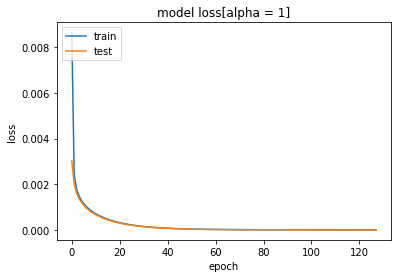

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss[alpha = 1]')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
 history.model.evaluate(x_test_scaled, y_test_scaled)


4/4 [==============================] - 0s 5ms/step - loss: 1.0262


1.0262038493156433

In [ ]:
history.model.evaluate(x_train_scaled,y_train_scaled)

10/10 [==============================] - 0s 2ms/step - loss: 1.0261


1.0261266732215881